# DATA CLEANING FOR THE COVID CASES DATASET

### This notebook demonstrates the handling of missing values for the Covid patients across the various states of United States. We delve into the dataset and explore different methods of hangdling missing values. The notebook has appropriate sections and comments to address the limitations and the insights the data gives.

## Data Loading and Importing Neccessary Libraries

In [1]:
# !pip install fancyimpute

In [32]:
# importing neccessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor
# from fancyimpute import IterativeImputer

In [33]:
# Loading the dataset from the provided link

url = "https://emd-coding-challenge.s3.us-east-2.amazonaws.com/covid-19-aqi/covid19/cases.csv.bz2"
df = pd.read_csv(url, compression='bz2')
df.head()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,AR,5.0,BOONE,5009.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
1,2021-10,MO,29.0,PHELPS,29161.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
2,2020-10,MO,29.0,CASS,29037.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN
3,2021-08,TN,47.0,CLAIBORNE,47025.0,0 - 17 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-11,GA,13.0,EFFINGHAM,13103.0,0 - 17 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN


## Initial Data Exploration
After loading the dataset, we perform some preliminary exploration to understand its structure and contents. This includes viewing the first few rows of the dataset, checking for data types, and summarizing the key statistics. This step helps in identifying any immediate data cleaning or transformation needs.


We observe the different features of the dataset. Now we explore the datatypes of the data we have in the dataset.

In [36]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

## Analysis of Data Types

Our COVID-19 dataset comprises various columns, each representing specific information about the cases. Understanding the data types of each column is essential for appropriate data handling and analysis. Here is a summary of the data types for each column:

- `case_month`: `object` (String), indicating the month of the COVID-19 case.
- `res_state`: `object` (String), representing the state of residence of the case.
- `state_fips_code`: `float64`, the Federal Information Processing Standards code for the state.
- `res_county`: `object` (String), indicating the county of residence.
- `county_fips_code`: `float64`, the Federal Information Processing Standards code for the county.
- `age_group`: `object` (String), representing the age group of the individual.
- `sex`: `object` (String), indicating the sex of the individual.
- `race`: `object` (String), representing the race of the individual.
- `ethnicity`: `object` (String), indicating the ethnicity of the individual.
- `case_positive_specimen_interval`: `float64`, representing the interval between specimen collection and the case testing positive.
- `case_onset_interval`: `float64`, the interval between the onset of the case and its reporting.
- `process`: `object` (String), indicating the process involved in the case reporting.
- `exposure_yn`: `object` (String), representing exposure information.
- `current_status`: `object` (String), indicating the current status of the case.
- `symptom_status`: `object` (String), representing the symptom status of the case.
- `hosp_yn`: `object` (String), indicating whether the individual was hospitalized.
- `icu_yn`: `object` (String), representing whether the individual was admitted to the ICU.
- `death_yn`: `object` (String), indicating whether the case resulted in death.
- `underlying_conditions_yn`: `object` (String), representing whether the individual had any underlying conditions.

The presence of both numerical (`float64`) and categorical (`object`) data types indicates the need for varied analytical approaches and data preprocessing methods, such as encoding for categorical variables and handling numerical data appropriately for analysis.


In [37]:
df.describe()

,state_fips_code,county_fips_code,case_positive_specimen_interval,case_onset_interval
count,3.753115e+07,3.497079e+07,1.241888e+07,1.731066e+07
mean,2.574162e+01,2.564581e+04,2.008112e-01,9.994835e-02
std,1.585494e+01,1.586762e+04,1.770156e+00,1.788816e+00
min,1.000000e+00,1.001000e+03,-8.100000e+01,-5.900000e+01
25%,1.200000e+01,1.201500e+04,0.000000e+00,0.000000e+00
50%,2.600000e+01,2.502700e+04,0.000000e+00,0.000000e+00
75%,3.900000e+01,3.904300e+04,0.000000e+00,0.000000e+00
max,7.800000e+01,5.604100e+04,8.700000e+01,8.300000e+01


## Statistical Summary of Key Numerical Columns

We have analyzed several numerical columns in our dataset to gain insights into their distribution and variability. The columns include state and county FIPS codes, and intervals for case positive specimen and case onset. Here is a detailed statistical summary:

- **State FIPS Code (`state_fips_code`):**
  - **Count:** 37,531,150 entries.
  - **Mean:** Approximately 25.74, indicating the average FIPS code.
  - **Standard Deviation:** 15.85, showing the variability in FIPS codes.
  - **Min-Max Range:** From 1 to 78, encompassing the range of FIPS codes.

- **County FIPS Code (`county_fips_code`):**
  - **Count:** 34,970,790 entries.
  - **Mean:** Approximately 25,645.81, indicating the average FIPS code for counties.
  - **Standard Deviation:** 15,867.62, suggesting a wide range of county FIPS codes.
  - **Min-Max Range:** From 1,001 to 56,041.

- **Case Positive Specimen Interval (`case_positive_specimen_interval`):**
  - **Count:** 12,418,880 entries.
  - **Mean:** 0.2008, indicating the average interval between specimen collection and case positive report.
  - **Standard Deviation:** 1.77, which shows the variation in this interval.
  - **Min-Max Range:** From -81 to 87, which might indicate data entry errors or specific coding in the dataset.

- **Case Onset Interval (`case_onset_interval`):**
  - **Count:** 17,310,660 entries.
  - **Mean:** 0.0999, representing the average interval between case onset and reporting.
  - **Standard Deviation:** 1.7888, showing the variability of this interval.
  - **Min-Max Range:** From -59 to 83, which, similar to the specimen interval, may suggest anomalies in data entry or specific coding conventions.

The presence of negative values in the intervals suggests there might be data entry errors or specific codes that need further investigation. The large standard deviations in these intervals indicate high variability, which could be significant for our analysis. Understanding these distributions is crucial for interpreting the data correctly and making informed analytical decisions.


Now we check for the missing values.

## Handling Missing Values
Handling missing values is a critical step in preparing the dataset for analysis. Proper handling of missing data ensures the accuracy and reliability of our analysis. The approach taken here involves:

1. Identifying missing values across different columns.
2. Deciding on an appropriate strategy for each column - such as imputation or removal.
3. Implementing the chosen strategy.
This section details each of these steps and their rationale.


In [4]:
df.isnull().sum()

case_month                               12
res_state                               920
state_fips_code                         920
res_county                          2561284
county_fips_code                    2561284
age_group                            406634
sex                                 1244276
race                                6597416
ethnicity                           7837672
case_positive_specimen_interval    25113195
case_onset_interval                20221411
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                            1752914
underlying_conditions_yn           35206303
dtype: int64

We can observe the number of missing values in the dataset. We can be sure that the dataset contains a lot of missing values so we will need to handle each column seperately and make a decision whether to impute these columns or drop them.

Upon observation, we found that some values instead of NaN are named as "Missing". So we replace those values with NaN to get a better insight for missing values.

In [38]:
df.replace("Missing",np.nan,inplace=True)
df.isnull().sum()

case_month                               12
res_state                               920
state_fips_code                         920
res_county                          2561284
county_fips_code                    2561284
age_group                            761547
sex                                 1290097
race                                9349237
ethnicity                          10022760
case_positive_specimen_interval    25113195
case_onset_interval                20221411
process                            35656638
exposure_yn                        34192511
current_status                            0
symptom_status                     14700040
hosp_yn                            15609769
icu_yn                             31662298
death_yn                           19415329
underlying_conditions_yn           35206303
dtype: int64

We also observe that some values also contain nul in columns like symptom_status. Hence we replace them wih NaN as well.

In [39]:
df.replace("nul",np.nan,inplace=True)
df.isnull().sum()

case_month                               12
res_state                               920
state_fips_code                         920
res_county                          2561284
county_fips_code                    2561284
age_group                            761547
sex                                 1290097
race                                9349237
ethnicity                          10022760
case_positive_specimen_interval    25113195
case_onset_interval                20221411
process                            35656638
exposure_yn                        34192511
current_status                            0
symptom_status                     14700353
hosp_yn                            15609769
icu_yn                             31662729
death_yn                           19415329
underlying_conditions_yn           35206303
dtype: int64

## Analysis of Missing Values

In our COVID-19 dataset, we have several columns each representing specific attributes related to the cases. Below is a summary of the count of missing values in each column:

- `case_month`: 12 missing values, indicating the month of the COVID-19 case.
- `res_state`: 920 missing values, representing the state of residence.
- `state_fips_code`: 920 missing values, showing the FIPS code for the state.
- `res_county`: 2,561,284 missing values, indicating the county of residence.
- `county_fips_code`: 2,561,284 missing values, for the FIPS code of the county.
- `age_group`: 761,547 missing values, representing the age group of the individuals.
- `sex`: 1,290,097 missing values, indicating the sex of the individuals.
- `race`: 9,349,237 missing values, showing the race of the individuals.
- `ethnicity`: 10,022,760 missing values, representing the ethnicity of the individuals.
- `case_positive_specimen_interval`: 25,113,195 missing values, the interval between specimen collection and the case turning positive.
- `case_onset_interval`: 20,221,411 missing values, the interval between the case onset and the reporting.
- `process`: 35,656,638 missing values, indicating the process involved in the case.
- `exposure_yn`: 34,192,511 missing values, representing exposure information.
- `current_status`: No missing values, showing the current status of the case.
- `symptom_status`: 14,700,353 missing values, indicating the status of symptoms in the case.
- `hosp_yn`: 15,609,769 missing values, representing hospitalization status.
- `icu_yn`: 31,662,729 missing values, indicating whether the case was admitted to ICU.
- `death_yn`: 19,415,329 missing values, showing if the case resulted in death.
- `underlying_conditions_yn`: 35,206,303 missing values, indicating if there were any underlying conditions.

This comprehensive view of missing data across our dataset is crucial for planning our data cleaning and imputation strategies. The missing values need to be addressed appropriately to ensure the integrity and reliability of our subsequent analyses.


For us, the factors that are related to hospitalization and aqi are of prime importance. But the columns
process, exposure_yn, death_yn & underlying_conditions_yn have more than 95% missing values. So instead of imputation and introducing any bias, it is better preferable to drop these columns itself. Hence we drop these columns.

In [40]:
df.drop(columns=['process','exposure_yn','death_yn','underlying_conditions_yn'],inplace=True,axis=1)

Now from common sense, we can say that the people who are admitted in the ICU (Intensive Care Unit) are bound to be admitted in a hospital. So we check if any values in ICU are valid given any values in hospital_yn are missing so that we can remove those

In [41]:
df.loc[(df['icu_yn'] == 'Yes') & (df['hosp_yn'].isna()), 'hosp_yn'] = 'Yes'
print(df['hosp_yn'].value_counts(dropna=False))

No         15630029
NaN        15609767
Unknown     4605502
Yes         1686774
Name: hosp_yn, dtype: int64




In our dataset, the `hosp_yn` column, which indicates hospitalization status, contains three categories of values. To simplify our analysis and focus specifically on severe cases, we will update this column based on ICU admission information.

- **Preprocessing Strategy:**
  - We will fill the `hosp_yn` column with 'Yes' for all cases where the individual is hospitalized and admitted to the ICU.
  - This approach helps us to categorize cases more distinctly based on the severity and requirement of intensive care.
  - Such preprocessing is crucial for analyzing the impact of hospitalization, particularly for severe COVID-19 cases.

By doing this, we aim to streamline our data for subsequent analysis, focusing on hospitalizations that involved ICU admissions, which are indicative of more severe COVID-19 cases.


So we drop ICU column to avoid redundancy

In [42]:
df.drop(columns=['icu_yn'],inplace=True,axis=1)

Now as we can case month column has 12 missing values which is minuscule in comparison to total number of records. Hence, we drop the rows with case month having missing values

In [43]:
df.dropna(subset=['case_month'],inplace=True)

Now we analyze for the resident state and state FIPS code. As both the column denote the same thing we can drop the FIPS code.

In [11]:
s1 =df[(df['res_state'].isna()) & (df['state_fips_code'].isna())].shape
s2 = df[pd.isna(df['res_state']) & pd.notna(df['state_fips_code'])].shape
print(s1,s2)

(908, 14) (0, 14)


We check whether in any case we have the FIPS code while the value of state is missing. This may help us in imputing the values for the State column from the FIPS code. But we see there are no such cases. Hence we can directly drop the state FIPS code column.

In [44]:
df.drop(columns='state_fips_code',inplace=True,axis=1)

Doing the similar for res_county column

In [13]:
s1 =df[(df['res_county'].isna()) & (df['county_fips_code'].isna())].shape
s2=df[pd.isna(df['res_county']) & pd.notna(df['county_fips_code'])].shape
print(s1,s2)

(2561272, 13) (0, 13)


Again no anomalies, hence dropping the county FIPS code column

In [45]:
df.drop(columns=['county_fips_code'],inplace=True,axis=1)

## Heatmap of Missing Values

In this section, we generate a heatmap to visually inspect the presence of missing values across different columns in our dataset.

This heatmap is a powerful tool for quickly identifying patterns of missing data, helping us determine if the missing values are random or systematic and thus informing our approach to data cleaning and imputation.


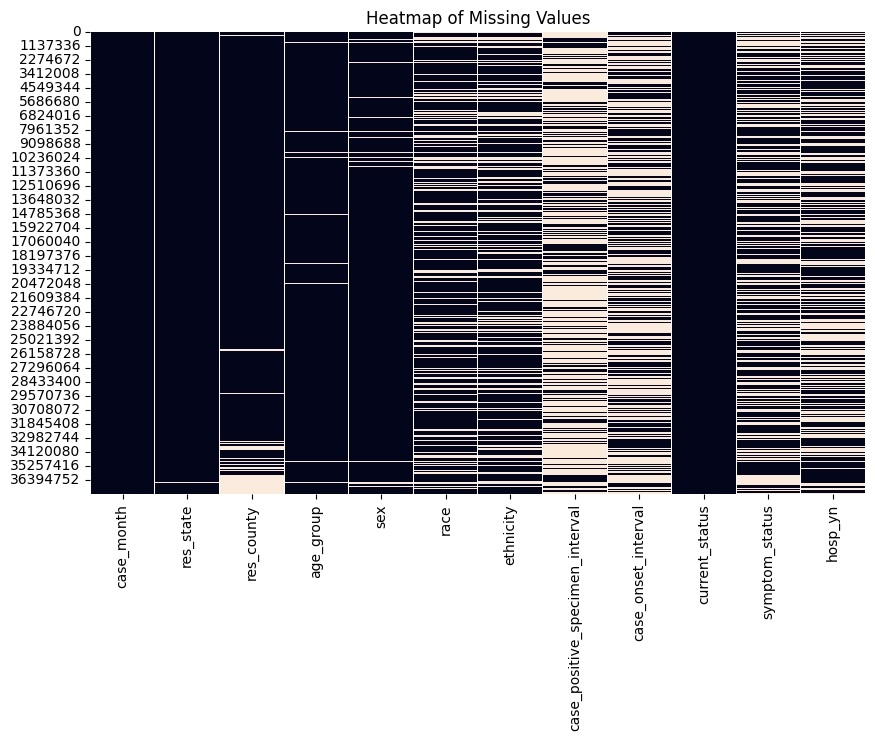

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()

### Observations from the Heatmap of Missing Values

The heatmap visualizes the missing data across various columns in the dataset:

- Each column on the x-axis represents a different variable, while each row corresponds to a record in the dataset.
- The light-colored lines across the columns signify the presence of missing values. Columns that are entirely dark have no missing data.
- It is evident that missing data is not uniformly distributed across the columns. Some columns have a higher frequency of missing data, as indicated by the greater number of light-colored lines.
- The columns `race`, `ethnicity`, `case_positive_specimen_interval`, and `case_onset_interval` display a significant number of missing values, which suggests that these areas might require attention during the data cleaning process.
- Other columns such as `case_month`, `res_state`, and `res_county` show fewer missing values, which may indicate that the data in these columns is more complete.

This heatmap is instrumental in our preliminary data analysis, providing a quick and clear overview of the dataset's completeness. It highlights the need for further investigation into the nature of the missing data and will inform our strategy for data imputation or omission during the cleaning phase.


We observe that age group and sex have the least missing values. Hence, we can impute those with mode.

In [48]:
df['age_group'].value_counts()
age_group_mode = df['age_group'].mode()[0]  
df['age_group'] = df['age_group'].fillna(age_group_mode)

We observe that for the sex column the number of males and females are almost same hence we do a probabilistic imputation for sex column

In [17]:
df['sex'].value_counts()


Female     18846393
Male       17160125
Unknown      235445
Other            12
Name: sex, dtype: int64



- **Probability Calculation:**
  - We first calculate the probabilities of the dataset being 'Female' or 'Male' based on the observed frequencies.
  - `prob_female` is the proportion of 'Female' entries in the non-missing data.
  - `prob_male` is derived as `1 - prob_female`, representing the proportion of 'Male' entries.

- **Data Imputation:**
  - We use a random number generator, with a fixed seed for reproducibility, to assign 'Female' or 'Male' to missing entries.
  - The `np.random.choice` method is used to randomly select 'Female' or 'Male' with the calculated probabilities for each missing value.
  - This method of imputation preserves the underlying distribution of the 'sex' variable in the dataset.

By imputing the missing 'sex' data in this way, we aim to maintain the integrity of the dataset's gender ratio, allowing for more accurate analysis without introducing bias that might come from disproportionate imputation.


In [18]:
# import numpy as np

# Probability of each gender based on non-missing data
prob_female = df['sex'].value_counts()[0] / (df['sex'].value_counts()[1] + df['sex'].value_counts()[0])
prob_male = 1 - prob_female

# Randomly assign values based on observed probabilities
np.random.seed(0)  # For reproducibility
df.loc[df['sex'].isnull(), 'sex'] = np.random.choice(
    ['Female', 'Male'],
    size=df['sex'].isnull().sum(),
    p=[prob_female, prob_male]
)

In [19]:
df.drop(columns=['race','ethnicity','case_positive_specimen_interval','case_onset_interval'],inplace=True,axis=1)

In the data cleaning phase, we have decided to remove certain columns that are either not relevant to our main analysis or contain a large number of missing values, which could compromise the quality of our insights.


  - `race` and `ethnicity`: These columns have been dropped as they are deemed not directly relevant to the analysis of AQI and hospitalization rates.
  - `case_positive_specimen_interval` and `case_onset_interval`: These columns have been removed due to the significant amount of missing data, which presents challenges in imputation and could introduce bias into our analysis.


Now we will analyze the county column. For us to get a better understanding we will see the proportion of missing values for county for a given state so that we can decide on the imputation strategy. As it is a decently small number we choose to impute.

In [49]:
# Calculate total count per state
total_count_per_state = df.groupby('res_state').size()

# Calculate missing count per state
missing_count_per_state = df[df['res_county'].isna()].groupby('res_state').size()

# Calculate proportion of missing values per state
missing_proportion_per_state = (missing_count_per_state / total_count_per_state)*100

# Convert the Series to a DataFrame for better formatting
missing_proportion_df = missing_proportion_per_state.reset_index()
missing_proportion_df.columns = ['res_state', 'Missing Proportion']

# Print the result
print(missing_proportion_df)

   res_state  Missing Proportion
0         AK           28.231608
1         AL            9.443209
2         AR           18.103305
3         AZ            0.452554
4         CA            0.261998
5         CO            6.100356
6         CT            0.866692
7         DC          100.000000
8         DE            4.211550
9         FL            1.206208
10        GA           14.904588
11        GU          100.000000
12        HI            8.665299
13        IA           26.793252
14        ID           11.055103
15        IL            5.581206
16        IN            5.375862
17        KS           19.278097
18        KY           29.656871
19        LA           66.494101
20        MA            0.691570
21        MD            1.655289
22        ME            3.717660
23        MI            2.793662
24        MN            8.155411
25        MO           47.560097
26        MS           62.447701
27        MT           28.510614
28        NC            2.642464
29        

The analysis of missing county data across states has yielded the following insights:

- A wide variation in the proportion of missing `res_county` data exists across different states.
- Certain states like `DC`, `GU`, `PR`, and `VI` have 100% missing data for the county column, which indicates that the county data is completely absent or was never collected for these regions.
- States such as `WV`, `MS`, and `TX` show very high percentages of missing county data (above 40%), suggesting that for a significant portion of the records from these states, the county information is not available.
- On the other hand, there are states like `AZ`, `CA`, `CT`, `MA`, `NJ`, `NY`, `NH`, and `RI` where the missing data is relatively minimal (less than 1%), indicating that the county data is largely complete for these areas.
- The variation in missing data could be due to several factors, such as differences in data collection processes across states or reporting standards.

So we decide a strategy where if the proportion of missing values is less than 20%. We impute using mode. Otherwise we drop the rows with missing values greater than 20%. It is a lot of information loss. But rather than imputing with stats, we rather drop in order to preserve the integrity of data as in future, county will play a crucial role for us to analyze the relation between AQI and Hospitalization rates.

In [22]:

# States with less than 20% missing values in 'res_county'
states_less_than_20_missing = missing_proportion_per_state[missing_proportion_per_state < 20].index

# Fill missing values with mode for these states
for state in states_less_than_20_missing:
    mode_value = df.loc[df['res_state'] == state, 'res_county'].mode()[0]
    df.loc[(df['res_state'] == state) & (df['res_county'].isna()), 'res_county'] = mode_value

# Drop rows with missing 'res_county' in states with more than 20% missing values
states_more_than_20_missing = missing_proportion_per_state[missing_proportion_per_state >= 20].index
df = df[~((df['res_state'].isin(states_more_than_20_missing)) & (df['res_county'].isna()))]


In [23]:
df.isnull().sum()

case_month               0
res_state              908
res_county             908
age_group                0
sex                      0
current_status           0
symptom_status    14100341
hosp_yn           15146716
dtype: int64

Now we drop the remaining state and county rows that both had missing values.

In [24]:
df.dropna(subset=['res_state','res_county'],inplace=True)

Now we see that both the columns symptom_status and hosp_yn, probably the most important parameters for our analysis.

In [25]:
df.isnull().sum()

case_month               0
res_state                0
res_county               0
age_group                0
sex                      0
current_status           0
symptom_status    14099946
hosp_yn           15146406
dtype: int64

We split the date into year and month to ease our analysis

In [26]:
df['year'] = df['case_month'].apply(lambda x: x.split('-')[0]).astype(int)
df['month'] = df['case_month'].apply(lambda x: x.split('-')[1]).astype(int)
df.drop('case_month', axis=1, inplace=True)



For symptom_status and hosp_yn, we cannot afford to impute using mean, median or mode as this may introduce unwanted bias and degrade the data quality and may result in wrong analytical insights. So we tried a method called MICE.

MICE, which stands for Multiple Imputation by Chained Equations, is a statistical technique used to handle missing data. It's particularly useful when dealing with datasets where multiple variables have missing values, a common challenge in real-world data analysis. Here's an overview of how MICE works:

Multiple Imputation: Unlike simple imputation methods (like filling missing values with the mean or median), MICE creates several different imputed datasets. These datasets are generated by a series of regression models, accounting for the uncertainty around the missing data.

Chained Equations: The "chained equations" aspect of MICE refers to the sequential manner in which each variable with missing data is imputed. For each variable with missing data:

A model is fitted on the rest of the variables.
Missing values are then imputed using the fitted model.
This process is repeated for each variable in turn, in a "round-robin" fashion.


But as we have a lot of data. Due to computational limitations, we instead decide to drop both rows with missing values

In [28]:
df.dropna(subset=['symptom_status','hosp_yn'],inplace=True)


Now all the missing values are filled and we will save the csv file and move on to the next steps

In [29]:
df.isnull().sum()

res_state         0
res_county        0
age_group         0
sex               0
current_status    0
symptom_status    0
hosp_yn           0
year              0
month             0
dtype: int64

In [30]:
df.to_csv("Final_Cleaned.csv")

## Conclusion

In this notebook, we conducted a comprehensive analysis of a dataset focusing on COVID-19 patients. Our journey began with data loading and initial exploration, where we familiarized ourselves with the dataset's structure and contents. We identified and addressed missing values, employing techniques such as probability-based imputation for the `sex` column and direct omission of columns with extensive missing data or those deemed irrelevant to our analysis objectives.

Key observations and actions included:
- A high proportion of missing data in certain columns led to their removal to maintain the robustness of our analysis.
- We implemented a methodical approach to impute missing values for the `sex` column, preserving the underlying distribution of the dataset.
- The visualization of missing data helped highlight the need for careful consideration of data quality and completeness, particularly for geographic variables like `res_county`.

.

By documenting each step of our analytical process, we aimed to ensure transparency, reproducibility, and a clear understanding of our methodologies and findings. We believe that this notebook not only demonstrates our analytical capabilities but also showcases our commitment to thoroughness and attention to detail in data analysis.


## References

1. MICE: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html